 # Samenvatting

## Begrip kansverdeling

### Relatie met frequenties
Stel:
- Je gooit met 2 dobbelstenen en schrijft de som van de twee waarden op.
- Wat is de kans dat je een 3 gooit en wat is de kans dat je een 7 gooit?
Deze kansen kunnen benaderen door het experiment heel vaak uit te voeren en te kijken hoe vaak je een 3 of een 7 gooit.
We kunnen de kans ook theoretisch berekenen.
- Er zijn 36 mogelijke uitkomsten (6 mogelijkheden voor de eerste dobbelsteen en 6 mogelijkheden voor de tweede dobbelsteen).

**Worpen**

|       | 1     | 2     | 3     | 4     | 5     | 6     |
|-------|-------|-------|-------|-------|-------|-------|
| **1** | (1,1) | (1,2) | (1,3) | (1,4) | (1,5) | (1,6) |
| **2** | (2,1) | (2,2) | (2,3) | (2,4) | (2,5) | (2,6) |
| **3** | (3,1) | (3,2) | (3,3) | (3,4) | (3,5) | (3,6) |
| **4** | (4,1) | (4,2) | (4,3) | (4,4) | (4,5) | (4,6) |
| **5** | (5,1) | (5,2) | (5,3) | (5,4) | (5,5) | (5,6) |
| **6** | (6,1) | (6,2) | (6,3) | (6,4) | (6,5) | (6,6) |

⇒

**Som van de ogen**

|       | 1 | 2 | 3 | 4  | 5  | 6  |
|-------|---|---|---|----|----|----|
| **1** | 2 | 3 | 4 | 5  | 6  | 7  |
| **2** | 3 | 4 | 5 | 6  | 7  | 8  |
| **3** | 4 | 5 | 6 | 7  | 8  | 9  |
| **4** | 5 | 6 | 7 | 8  | 9  | 10 |
| **5** | 6 | 7 | 8 | 9  | 10 | 11 |
| **6** | 7 | 8 | 9 | 10 | 11 | 12 |

Uit bovenstaande tabel kunnen we afleiden dat:
- Het gooien van een som van 7 het vaakste voorkomt.

Als we willen weten wat de kans is om een 3 te gooien, dan moeten we tellen hoeveel van de 36 mogelijkheden een som van 3 opleveren. Dit zijn er 2: (1,2) en (2,1). De kans om een 3 te gooien is dus 2/36 = 1/18.

Voor de andere waarden vinden we:

| Waarde | Kans |
|--------|------|
| 2      | 1/36 |
| 3      | 2/36 |
| 4      | 3/36 |
| 5      | 4/36 |
| 6      | 5/36 |
| 7      | 6/36 |
| 8      | 5/36 |
| 9      | 4/36 |
| 10     | 3/36 |
| 11     | 2/36 |
| 12     | 1/36 |

In Python kunnen we deze kansen ook laten zien:

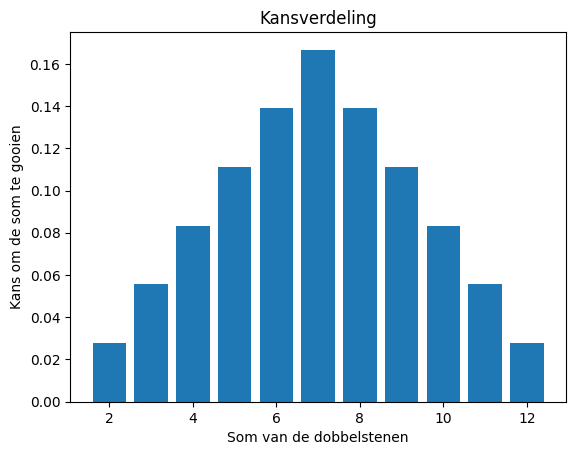

In [8]:
from functions.functions_Y2.Kansverdeling import *
import pandas as pd

value = range(2, 13)
prob = pd.Series([1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]) / 36

verdeling = pd.Series([value, prob])

kansverdeling(verdeling, 'Som van de dobbelstenen', 'Kans om de som te gooien')

Bovenstaande grafiek wordt een kansverdeling genoemd.
Een kansverdeling is een overzicht van alle relatieve frequenties van een oneindige steekproef.


## Gemiddelde en standaardafwijking
Aangezien een kansverdeling een frequentietabel is, kunnen we hiervoor het gemiddelde en de standaardafwijking berekenen.
De formule voor het gemiddelde is:
$$ x̅ = \sum_{i=1}^{n} x_i \cdot f_i$$
en voor de standaardafwijking:
$$ s = \sqrt{\sum_{i=1}^{n} (x_i - x̅)^2 \cdot f_i}$$

Om deze formules te gebruiken voor een kansverdeling, moeten we de frequenties vervangen door kansen. De formules worden dan:
$$ μ = \sum_{i=1}^{n} x_i \cdot P(x_i)$$
en
$$ σ = \sqrt{\sum_{i=1}^{n} (x_i - x̅)^2 \cdot P(x_i)}$$

Deze kunnen in python worden berekend als volgt:

In [11]:
from functions.functions_Y2.StandardDeviationAndAverage import *

µ = (value * prob).sum()
#of
average(value, prob)

6.999999999999998

In [12]:
σ = math.sqrt(((value - µ) ** 2 * prob).sum())
#OF
standard_deviation(value, prob)

2.41522945769824

De gevonden waarden betekenen dat:
- Het gevonden gemiddelde is het verwachte gemiddelde van een steekproef. Als we een steekproef doen, verwachten we dus een gemiddelde in de buurt van dit gemiddelde. Daarom dat men dit getal "verwachten waarde" noemt.
- De gevonden standaardafwijking is ook de verwachte (gemiddelde) afwijking die we bij een steekproef zouden vinden.

In dit geval vinden we dat μ = 7 en σ = 2.415. Als we dus een steekproef zouden doen, dan verwachten we dat de gegooide waarde gemiddeld rond de 7 zal liggen. We verwachten ook dat de gemiddelde afwijking van alle waarden ten opzichte van die 7, ongeveer 2.4 zal zijn.